In [1]:
#%matplotlib inline
import math
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt


#!pip install scikit-plot
#!pip install dmba
#from dmba import regressionSummary, classificationSummary, liftChart, gainsChart


In [290]:
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df = pd.read_csv('Global Count Data for Datathon.csv')

In [5]:
df.head()

,row_id,unique_id,survey_type,iso3166,surveydate,city_town,city_town_tr,country_of_residence,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,age,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,...,barrier_person_immigrant_and_refugee_rights,barrier_person_indigenous_andor_roma_rights,barrier_person_LGBTQI+_rights,barrier_racial_equity,barrier_person_reproductive_freedom_and_bodily_autonomy,barrier_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,barrier_city_civil_rights_and_freedoms,barrier_city_disability_rights,barrier_city_economic_and_workers_rights,barrier_city_education_and_youth_empowerment,barrier_city_ending_violence_harassment_and_abuse,barrier_city_environmental_justice,barrier_city_immigrant_and_refugee_rights,barrier_city_indigenous_andor_roma_rights,barrier_city_LGBTQI+_rights,barrier_city_racial_equity,barrier_city_reproductive_freedom_and_bodily_autonomy,barrier_city_sexual_reproductive_and_parental_health,npo_1,npo_2,npo_3,progress_10_years,npo_1_tr,npo_2_tr,npo_3_tr,progress_10_years_tr,language,langauge_score
0,2,12327918977,long,UK,1/15/2021 19:26,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,1,0,0,0,0,...,Political,NaN,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,Cultural/Social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,12327959040,long,UK,1/15/2021 19:46,Maidstone,Maidstone,United Kingdom of Great Britain and Northern I...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25 to 34,0,0,0,0,1,0,...,NaN,Cultural/Social,Cultural/Social,NaN,NaN,NaN,0,0,0,1,0,0,1,0,1,0,0,0,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Economic,NaN,Cultural/Social,NaN,NaN,NaN,Na,na,NaN,NaN,On,on,ON,NaN,pl,1.00
2,4,12340367937,long,CA,1/20/2021 20:22,Waterloo,Waterloo,Canada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,12340336342,long,CH,1/20/2021 20:29,Zuerich,Zuerich,Switzerland,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45 to 54,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,Cultural/Social,NaN,0,0,1,0,0,0,1,0,0,1,0,0,NaN,NaN,Political,NaN,NaN,NaN,Cultural/Social,NaN,NaN,Cultural/Social,NaN,NaN,Amnesty International,Frauenstreik Züeich,Schweizerischer Gewerkschaftsbund & VPOD Gewer...,"Gleichstellung und Respekt bei der Arbeit, gle...",Amnesty International,Frauenstreik Züeich,Swiss Trade Union Confederation & VPOD Trade U...,"Equality and respect at work, the same AHV for...",de,0.97
4,6,12340427318,long,BE,1/20/2021 20:47,Brussels,Brussels,Belgium,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35 to 44,0,0,1,0,0,0,...,Political,NaN,Political,NaN,NaN,NaN,1,0,0,0,0,0,1,0,0,1,0,0,Education,NaN,NaN,NaN,NaN,NaN,Political,NaN,NaN,Education,NaN,NaN,SINGA,SINGA,NaN,More women in high political positions. Ac

In [6]:
df.shape 

(24051, 92)

We have 2,4051 observations and 92 variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24051 entries, 0 to 24050
Data columns (total 92 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   row_id                                                   24051 non-null  int64  
 1   unique_id                                                24051 non-null  int64  
 2   survey_type                                              24051 non-null  object 
 3   iso3166                                                  24046 non-null  object 
 4   surveydate                                               24051 non-null  object 
 5   city_town                                                24049 non-null  object 
 6   city_town_tr                                             20503 non-null  object 
 7   country_of_residence                                     24050 non-null  object 
 8   gender_not_listed         

In [9]:
df.describe()

,row_id,unique_id,gender_not_listed,cisgender_man,cisgender_woman,non_conforming_or_non_binary,gender_choose_not_to_identify,man,transgender_man,transgender_woman,woman,racial_identity_not_listed,asian,biracial_or_mixed,black_or_of_african_descent,hispanic_or_latinx,choose_not_to_identify,indigenous,indigenous_central_or_south_american,middle_eastern,native_american,native_hawaiian,north_african,pacific_islander,south_asian,southeast_asian,white,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health,langauge_score
count,24051.000000,2.405100e+04,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,24051.000000,12954.000000
mean,16546.948776,1.251752e+10,0.006653,0.004241,0.061536,0.013180,0.019001,0.045445,0.003908,0.006528,0.725791,0.044572,0.086192,0.045362,0.197913,0.045029,0.070600,0.074467,0.007359,0.011850,0.003992,0.001996,0.015301,0.002453,0.007692,0.004033,0.284105,0.293002,0.103696,0.216332,0.386969,0.631949,0.232007,0.085942,0.031059,0.098000,0.195085,0.100495,0.160659,0.095173,0.043283,0.125109,0.126648,0.174338,0.093135,0.067398,0.015841,0.044489,0.070475,0.019542,0.044780,0.981054
std,9205.273519,1.084311e+08,0.081293,0.064986,0.240316,0.114049,0.136532,0.208283,0.062396,0.080532,0.446124,0.206366,0.280653,0.208101,0.398434,0.207373,0.256161,0.262534,0.085472,0.108212,0.063054,0.044630,0.122749,0.049469,0.087368,0.063380,0.450996,0.455149,0.304873,0.411752,0.487067,0.482285,0.422122,0.280285,0.173481,0.297321,0.396275,0.300665,0.367223,0.293460,0.203498,0.330850,0.332585,0.379408,0.290628,0.250716,0.124864,0.206183,0.255952,0.138422,0.206825,0.121725
min,2.000000,1.232792e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8621.500000,1.241207e+10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [43]:
# To see all my data 
pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [44]:
df.isnull().sum()

row_id                                                         0
unique_id                                                      0
survey_type                                                    0
iso3166                                                        5
surveydate                                                     0
city_town                                                      2
city_town_tr                                                3548
country_of_residence                                           1
gender_not_listed                                              0
cisgender_man                                                  0
cisgender_woman                                                0
non_conforming_or_non_binary                                   0
gender_choose_not_to_identify                                  0
man                                                            0
transgender_man                                                0
transgender_woman        

From the information above, we have lots of missing data in our dataset, so we can not drop the missing values,lets try to impute with median values for numerical missing datasets and mode values for object type missing dataset since we are assuming that there are no outliers... 

In [70]:
mode1 = df['barrier_city_civil_rights_and_freedoms'].mode().values[0]
df['barrier_city_civil_rights_and_freedoms']=df['barrier_city_civil_rights_and_freedoms'].replace(np.nan,mode1)
mode2 = df['barrier_city_disability_rights'].mode().values[0]
df['barrier_city_disability_rights']=df['barrier_city_disability_rights'].replace(np.nan,mode2)
mode3 = df['barrier_city_economic_and_workers_rights'].mode().values[0]
df['barrier_city_economic_and_workers_rights']=df['barrier_city_economic_and_workers_rights'].replace(np.nan,mode3)
mode4 = df['barrier_person_education_and_youth_empowerment'].mode().values[0]
df['barrier_person_education_and_youth_empowerment']=df['barrier_person_education_and_youth_empowerment'].replace(np.nan,mode4)
mode5 = df['barrier_city_ending_violence_harassment_and_abuse'].mode().values[0]
df['barrier_city_ending_violence_harassment_and_abuse']=df['barrier_city_ending_violence_harassment_and_abuse'].replace(np.nan,mode5)
mode6 = df['barrier_city_environmental_justice'].mode().values[0]
df['barrier_city_environmental_justice']=df['barrier_city_environmental_justice'].replace(np.nan,mode6)
mode7 = df['barrier_city_immigrant_and_refugee_rights'].mode().values[0]
df['barrier_city_immigrant_and_refugee_rights']=df['barrier_city_immigrant_and_refugee_rights'].replace(np.nan,mode7)
mode8 = df['barrier_city_indigenous_andor_roma_rights'].mode().values[0]
df['barrier_city_indigenous_andor_roma_rights']=df['barrier_city_indigenous_andor_roma_rights'].replace(np.nan,mode8)
mode9 = df['barrier_city_LGBTQI+_rights'].mode().values[0]
df['barrier_city_LGBTQI+_rights']=df['barrier_city_LGBTQI+_rights'].replace(np.nan,mode9)
mode10 = df['barrier_city_racial_equity'].mode().values[0]
df['barrier_city_racial_equity']=df['barrier_city_racial_equity'].replace(np.nan,mode10)
mode11 = df['barrier_city_reproductive_freedom_and_bodily_autonomy'].mode().values[0]
df['barrier_city_reproductive_freedom_and_bodily_autonomy']=df['barrier_city_reproductive_freedom_and_bodily_autonomy'].replace(np.nan,mode11)
mode12 = df['barrier_city_sexual_reproductive_and_parental_health'].mode().values[0]
df['barrier_city_sexual_reproductive_and_parental_health']=df['barrier_city_sexual_reproductive_and_parental_health'].replace(np.nan,mode12)
mode13 = df['npo_1'].mode().values[0]
df['npo_1']=df['npo_1'].replace(np.nan,mode13)
mode14 = df['npo_2'].mode().values[0]
df['npo_2']=df['npo_2'].replace(np.nan,mode14)
mode15 = df['npo_3'].mode().values[0]
df['npo_3']=df['npo_3'].replace(np.nan,mode15)
mode16= df['progress_10_years'].mode().values[0]
df['progress_10_years']=df['progress_10_years'].replace(np.nan,mode16)
mode17 = df['npo_1_tr'].mode().values[0]
df['npo_1_tr']=df['npo_1_tr'].replace(np.nan,mode17)
mode18 = df['npo_2_tr'].mode().values[0]
df['npo_2_tr']=df['npo_2_tr'].replace(np.nan,mode18)
mode19 = df['npo_3_tr'].mode().values[0]
df['npo_3_tr']=df['npo_3_tr'].replace(np.nan,mode19)
mode20= df['progress_10_years_tr'].mode().values[0]
df['progress_10_years_tr']=df['progress_10_years_tr'].replace(np.nan,mode20)
mode21 = df['barrier_person_civil_rights_and_freedoms'].mode().values[0]
df['barrier_person_civil_rights_and_freedoms']=df['barrier_person_civil_rights_and_freedoms'].replace(np.nan,mode21)
mode22 = df['barrier_person_disability_rights'].mode().values[0]
df['barrier_person_disability_rights']=df['barrier_person_disability_rights'].replace(np.nan,mode22)
mode23 = df['barrier_person_economic_and_workers_rights'].mode().values[0]
df['barrier_person_economic_and_workers_rights']=df['barrier_person_economic_and_workers_rights'].replace(np.nan,mode23)
mode24 = df['barrier_person_education_and_youth_empowerment'].mode().values[0]
df['barrier_person_education_and_youth_empowerment']=df['barrier_person_education_and_youth_empowerment'].replace(np.nan,mode24)
mode25 = df['barrier_person_ending_violence_harassment_and_abuse'].mode().values[0]
df['barrier_person_ending_violence_harassment_and_abuse2']=df['barrier_person_ending_violence_harassment_and_abuse'].replace(np.nan,mode25)
mode26 = df['barrier_person_environmental_justice'].mode().values[0]
df['barrier_person_environmental_justice']=df['barrier_person_environmental_justice'].replace(np.nan,mode26)
mode27 = df['barrier_person_immigrant_and_refugee_rights'].mode().values[0]
df['barrier_person_immigrant_and_refugee_rights']=df['barrier_person_immigrant_and_refugee_rights'].replace(np.nan,mode27)
mode28 = df['barrier_person_indigenous_andor_roma_rights'].mode().values[0]
df['barrier_person_indigenous_andor_roma_rights']=df['barrier_person_indigenous_andor_roma_rights'].replace(np.nan,mode28)
mode29 = df['barrier_person_LGBTQI+_rights'].mode().values[0]
df['barrier_person_LGBTQI+_rights']=df['barrier_person_LGBTQI+_rights'].replace(np.nan,mode29)
mode30 = df['barrier_racial_equity'].mode().values[0]
df['barrier_racial_equity']=df['barrier_racial_equity'].replace(np.nan,mode30)
mode31 = df['barrier_person_reproductive_freedom_and_bodily_autonomy'].mode().values[0]
df['barrier_person_reproductive_freedom_and_bodily_autonomy']=df['barrier_person_reproductive_freedom_and_bodily_autonomy'].replace(np.nan,mode31)
mode32 = df['barrier_person_sexual_reproductive_and_parental_health'].mode().values[0]
df['barrier_person_sexual_reproductive_and_parental_health']=df['barrier_person_sexual_reproductive_and_parental_health'].replace(np.nan,mode32)
mode33 = df['city_town'].mode().values[0]
df['city_town']=df['city_town'].replace(np.nan,mode33)
mode34 = df['city_town_tr'].mode().values[0]
df['city_town_tr']=df['city_town_tr'].replace(np.nan,mode34)
mode35 = df['age'].mode().values[0]
df['age']=df['age'].replace(np.nan,mode35)
mode36 = df['iso3166'].mode().values[0]
df['iso3166']=df['iso3166'].replace(np.nan,mode36)
mode37 = df['barrier_city_education_and_youth_empowerment'].mode().values[0]
df['barrier_city_education_and_youth_empowerment']=df['barrier_city_education_and_youth_empowerment'].replace(np.nan,mode37)
mode38 = df['barrier_person_ending_violence_harassment_and_abuse'].mode().values[0]
df['barrier_person_ending_violence_harassment_and_abuse']=df['barrier_person_ending_violence_harassment_and_abuse'].replace(np.nan,mode38)
mode39 = df['language'].mode().values[0]
df['language']=df['language'].replace(np.nan,mode39)
mode40 = df['langauge_score'].mode().values[0]
df['langauge_score']=df['langauge_score'].replace(np.nan,mode40)
mode41 = df['country_of_residence'].mode().values[0]
df['country_of_residence']=df['country_of_residence'].replace(np.nan,mode41)

In [71]:
df.isnull().sum()

row_id                                                     0
unique_id                                                  0
survey_type                                                0
iso3166                                                    0
surveydate                                                 0
city_town                                                  0
city_town_tr                                               0
country_of_residence                                       0
gender_not_listed                                          0
cisgender_man                                              0
cisgender_woman                                            0
non_conforming_or_non_binary                               0
gender_choose_not_to_identify                              0
man                                                        0
transgender_man                                            0
transgender_woman                                          0
woman                   

Now, we don't have any more missing values...

In [73]:
df_dup = df.duplicated()
df_dup.sum()

0

We have no duplicate, every observation is unique...

**1a)Most critical issues that survey respondents face globally.**



In [95]:
df_crit_issues_global = df.iloc[:,34:46].sum().sort_values(ascending=True)
df_crit_issues_local = df.iloc[:,58:70].sum().sort_values(ascending=True)
df_crit_issues_all = df_crit_issues_global.append(df_crit_issues_local)


In [96]:
df_crit_issues_all = df_crit_issues_all.to_frame(name='Number_of_crit_issues_globally')


In [97]:
df_crit_issues_all.head()

,Number_of_crit_issues_globally
issue_person_indigenous_andor_roma_rights,747
issue_person_immigrant_and_refugee_rights,2067
issue_person_LGBTQI+_rights,2357
issue_person_reproductive_freedom_and_bodily_autonomy,2417
issue_person_disability_rights,2494


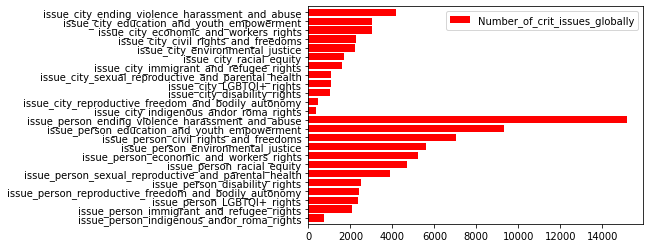

In [106]:
df_crit_issues_all.plot(kind='barh',width=0.8,color='red')

Globally, the most critical issues people face are violence and harrassment, followed by education and youth empowerment, and thirdly, civil rights and freedom.

**Most critical issues that survey respondents face by country.**

In [175]:
df_crit_issues_country = pd.concat([df.iloc[:,7], df.iloc[:,34:46], df.iloc[:,58:70]], axis=1)
df_crit_issues_country = df_crit_issues_country.groupby('country_of_residence').sum().reset_index()

In [176]:
df_crit_issues_country.insert(1,'tot_no_of_issues','a')

In [178]:
df_crit_issues_country['tot_no_of_issues'] = df_crit_issues_country[list(df_crit_issues_country.columns)].sum(axis=1)

In [179]:
df_crit_issues_country.head()

,country_of_residence,tot_no_of_issues,issue_person_civil_rights_and_freedoms,issue_person_disability_rights,issue_person_economic_and_workers_rights,issue_person_education_and_youth_empowerment,issue_person_ending_violence_harassment_and_abuse,issue_person_environmental_justice,issue_person_immigrant_and_refugee_rights,issue_person_indigenous_andor_roma_rights,issue_person_LGBTQI+_rights,issue_person_racial_equity,issue_person_reproductive_freedom_and_bodily_autonomy,issue_person_sexual_reproductive_and_parental_health,issue_city_civil_rights_and_freedoms,issue_city_disability_rights,issue_city_economic_and_workers_rights,issue_city_education_and_youth_empowerment,issue_city_ending_violence_harassment_and_abuse,issue_city_environmental_justice,issue_city_immigrant_and_refugee_rights,issue_city_indigenous_andor_roma_rights,issue_city_LGBTQI+_rights,issue_city_racial_equity,issue_city_reproductive_freedom_and_bodily_autonomy,issue_city_sexual_reproductive_and_parental_health
0,Afghanistan,1345.0,137,16,99,278,505,48,100,3,10,45,40,46,2,1,2,1,7,2,0,0,0,2,1,0
1,Albania,9.0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0
2,Algeria,33.0,4,1,0,5,4,4,1,2,1,3,0,0,1,0,2,1,1,0,0,1,1,0,0,1
3,Andorra,10.0,0,1,1,1,3,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
4,Angola,280.0,18,13,20,54,76,10,14,0,7,49,10,5,1,0,0,1,1,0,0,0,0,1,0,0


In [180]:
df_crit_issues_2=df_crit_issues_country.iloc[:,0:2].sort_values('tot_no_of_issues',
                                                                ascending=False).reset_index(0)

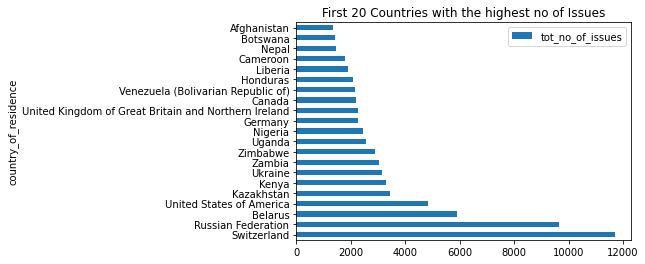

In [181]:
df_crit_issues_2.iloc[0:21].plot(kind='barh',x='country_of_residence',y='tot_no_of_issues',
                                 title='First 20 Countries with the highest no of Issues')